In [74]:
# 계산
import pandas as pd
import numpy as np

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [76]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [77]:
# 키움 관중 수 없는 데이터 가져오기
kiwoom_no_crowd = pd.read_csv('./Data/kiwoom.csv')
kiwoom_no_crowd

,날짜,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022.04.02(토),14:00,17:12,3:12,안우진,반즈,고척
1,2022.04.03(일),14:00,17:55,3:55,요키시,박세웅,고척
2,2022.04.05(화),18:30,21:34,3:04,애플러,임찬규,고척
3,2022.04.06(수),18:30,22:13,3:43,최원태,손주영,고척
4,2022.04.07(목),18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...
344,2024.06.04(화),18:30,21:32,3:02,이믿음,헤이수스,잠실
345,2024.06.05(수),18:30,21:57,3:27,최원태,하영민,잠실
346,2024.06.06(목),17:00,20:17,3:17,손주영,김인범,잠실
347,2024.06.07(금),18:31,21:42,3:11,조영건,원태인,고척


In [78]:
# 구장이 고척인 데이터만 가져오기
kiwoom_no_crowd = kiwoom_no_crowd[kiwoom_no_crowd['구장'] == '고척']
kiwoom_no_crowd

,날짜,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022.04.02(토),14:00,17:12,3:12,안우진,반즈,고척
1,2022.04.03(일),14:00,17:55,3:55,요키시,박세웅,고척
2,2022.04.05(화),18:30,21:34,3:04,애플러,임찬규,고척
3,2022.04.06(수),18:30,22:13,3:43,최원태,손주영,고척
4,2022.04.07(목),18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...
341,2024.05.31(금),18:30,21:23,2:53,김인범,오원석,고척
342,2024.06.01(토),17:01,19:53,2:52,조영건,시라카와,고척
343,2024.06.02(일),14:00,17:22,3:22,전준표,박종훈,고척
347,2024.06.07(금),18:31,21:42,3:11,조영건,원태인,고척


In [79]:
kiwoom_no_crowd['날짜'] = kiwoom_no_crowd['날짜'].str[:10].astype('datetime64[ns]')
kiwoom_no_crowd

,날짜,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...
341,2024-05-31,18:30,21:23,2:53,김인범,오원석,고척
342,2024-06-01,17:01,19:53,2:52,조영건,시라카와,고척
343,2024-06-02,14:00,17:22,3:22,전준표,박종훈,고척
347,2024-06-07,18:31,21:42,3:11,조영건,원태인,고척


In [80]:
kiwoom_no_crowd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       175 non-null    datetime64[ns]
 1   시작시간     175 non-null    object        
 2   종료시간     175 non-null    object        
 3   경기시간     175 non-null    object        
 4   홈팀 선발    175 non-null    object        
 5   어웨이팀 선발  175 non-null    object        
 6   구장       175 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 10.9+ KB


In [81]:
kiwoom_no_crowd = kiwoom_no_crowd[kiwoom_no_crowd['날짜'] < '2024-06-01']
kiwoom_no_crowd

,날짜,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...
332,2024-05-19,14:01,17:13,3:12,김인범,오원석,고척
333,2024-05-21,18:31,21:53,3:22,하영민,신민혁,고척
334,2024-05-22,18:31,21:54,3:23,후라도,하트,고척
335,2024-05-23,18:30,21:14,2:44,헤이수스,김시훈,고척


In [82]:
# 키움 관중 수 있는 데이터 가져오기
kiwoom_crowd = pd.read_csv('./Data/kiwoom_heroes_info(2022~2024).csv')
kiwoom_crowd

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055
...,...,...,...,...,...,...
168,2024-05-22,수,키움,NC,고척,4337
169,2024-05-23,목,키움,NC,고척,3897
170,2024-05-31,금,키움,SSG,고척,5680
171,2024-06-01,토,키움,SSG,고척,10462


In [83]:
kiwoom_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      173 non-null    object
 1   요일      173 non-null    object
 2   홈팀      173 non-null    object
 3   원정팀     173 non-null    object
 4   장소      173 non-null    object
 5   관중 수    173 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.2+ KB


In [84]:
kiwoom_crowd['날짜'] = kiwoom_crowd['날짜'].astype('datetime64[ns]')
kiwoom_crowd

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055
...,...,...,...,...,...,...
168,2024-05-22,수,키움,NC,고척,4337
169,2024-05-23,목,키움,NC,고척,3897
170,2024-05-31,금,키움,SSG,고척,5680
171,2024-06-01,토,키움,SSG,고척,10462


In [85]:
kiwoom_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   요일      173 non-null    object        
 2   홈팀      173 non-null    object        
 3   원정팀     173 non-null    object        
 4   장소      173 non-null    object        
 5   관중 수    173 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 8.2+ KB


In [86]:
kiwoom_crowd = kiwoom_crowd[kiwoom_crowd['날짜'] < '2024-06-01']
kiwoom_crowd

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055
...,...,...,...,...,...,...
166,2024-05-19,일,키움,SSG,고척,10049
167,2024-05-21,화,키움,NC,고척,3940
168,2024-05-22,수,키움,NC,고척,4337
169,2024-05-23,목,키움,NC,고척,3897


In [87]:
kiwoom_crowd[kiwoom_crowd.날짜 == '2023-09-09']

,날짜,요일,홈팀,원정팀,장소,관중 수
135,2023-09-09,토,키움,한화,고척,9962
136,2023-09-09,토,키움,한화,고척,10028


In [88]:
kiwoom_no_crowd = kiwoom_no_crowd.reset_index(drop=True)
kiwoom_no_crowd

,날짜,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...
166,2024-05-19,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,18:30,21:14,2:44,헤이수스,김시훈,고척


In [89]:
kiwoom_no_crowd[kiwoom_no_crowd.날짜 == '2023-09-09']

,날짜,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
135,2023-09-09,14:00,17:16,3:16,김동혁,김기중,고척
136,2023-09-09,17:47,21:25,3:38,이명종,남지민,고척


In [90]:
kiwoom = \
    pd.merge(
        kiwoom_crowd, kiwoom_no_crowd,
        on='날짜',
        how='outer'
        )
kiwoom

,날짜,요일,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,토,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,일,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,화,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,수,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,목,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-19,일,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
169,2024-05-21,화,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
170,2024-05-22,수,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
171,2024-05-23,목,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [91]:
kiwoom[kiwoom.날짜 == '2023-09-09']

,날짜,요일,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
135,2023-09-09,토,키움,한화,고척,9962,14:00,17:16,3:16,김동혁,김기중,고척
136,2023-09-09,토,키움,한화,고척,9962,17:47,21:25,3:38,이명종,남지민,고척
137,2023-09-09,토,키움,한화,고척,10028,14:00,17:16,3:16,김동혁,김기중,고척
138,2023-09-09,토,키움,한화,고척,10028,17:47,21:25,3:38,이명종,남지민,고척


In [92]:
kiwoom = kiwoom.drop(index=[136,138])
kiwoom

,날짜,요일,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,토,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,일,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,화,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,수,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,목,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-19,일,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
169,2024-05-21,화,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
170,2024-05-22,수,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
171,2024-05-23,목,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [93]:
kiwoom = kiwoom.reset_index(drop=True)
kiwoom

,날짜,요일,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,토,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,일,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,화,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,수,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,목,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,일,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,화,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,수,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,목,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [94]:
kiwoom.종료시간.unique()

array(['17:12', '17:55', '21:34', '22:13', '21:01', '21:16', '23:16',
       '21:17', '21:47', '16:49', '16:55', '21:46', '19:57', '17:26',
       '21:24', '19:45', '17:01', '21:53', '21:30', '21:04', '19:52',
       '17:14', '20:05', '22:14', '22:41', '21:20', '21:28', '21:42',
       '22:07', '22:21', '16:53', '17:10', '21:29', '21:22', '21:44',
       '16:39', '21:26', '17:11', '16:37', '22:17', '16:47', '21:52',
       '22:10', '21:13', '21:39', '17:52', '16:58', '22:32', '21:54',
       '21:51', '21:27', '21:43', '17:34', '20:13', '16:50', '20:21',
       '21:57', '22:12', '17:56', '17:36', '21:33', '21:40', '21:45',
       '19:56', '16:48', '22:50', '21:12', '21:35', '21:48', '16:35',
       '19:38', '18:40', '22:01', '20:06', '22:09', '21:15', '17:28',
       '17:08', '22:56', '21:21', '21:18', '22:20', '19:39', '17:40',
       '21:10', '23:01', '20:42', '21:09', '17:45', '22:03', '22:39',
       '17:15', '17:57', '22:28', '22:37', '20:08', '23:13', '17:16',
       '19:59', '19:

In [95]:
kiwoom.to_csv('./Data/kiwoom_final.csv')

In [96]:
# 필요한 열만 선택
kiwoom_date_crowd = kiwoom[['요일', '관중 수']]
kiwoom_date_crowd

,요일,관중 수
0,토,8257
1,일,6115
2,화,2298
3,수,2304
4,목,2055
...,...,...
166,일,10049
167,화,3940
168,수,4337
169,목,3897


In [97]:
kiwoom_date_crowd['요일'].unique()

array(['토', '일', '화', '수', '목', '금'], dtype=object)

In [98]:
# 요일 순서 설정 (월, 화, 수, 목, 금, 토, 일)
day_order = kiwoom_date_crowd['요일'].unique()

# 요일 순서에 맞게 정렬
kiwoom_date_crowd['요일'] = pd.Categorical(kiwoom_date_crowd['요일'], categories=day_order, ordered=True)

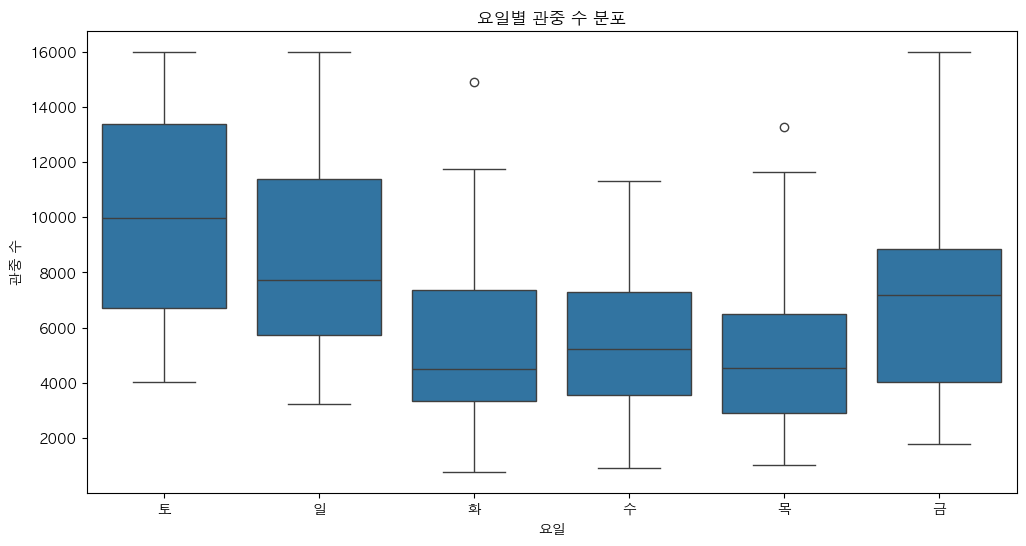

In [99]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='요일', y='관중 수', data=kiwoom_date_crowd)
plt.title('요일별 관중 수 분포')
plt.show()

In [100]:
from scipy.stats import f_oneway

# 요일별로 관중 수 그룹화
groups = [kiwoom_date_crowd['관중 수'][kiwoom_date_crowd['요일'] == day].values for day in day_order]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

ANOVA 결과: F-통계량 = 10.04, p-값 = 0.0000


In [101]:
if p_value < 0.05:
    print("요일별 관중 수 차이가 유의미합니다.")
else:
    print("요일별 관중 수 차이가 유의미하지 않습니다.")

요일별 관중 수 차이가 유의미합니다.


In [102]:
# 필요한 열만 선택
kiwoom_start_time_crowd = kiwoom[['시작시간', '관중 수']]
kiwoom_start_time_crowd

,시작시간,관중 수
0,14:00,8257
1,14:00,6115
2,18:30,2298
3,18:30,2304
4,18:30,2055
...,...,...
166,14:01,10049
167,18:31,3940
168,18:31,4337
169,18:30,3897


In [103]:
kiwoom_start_time_crowd.시작시간.unique()

array(['14:00', '18:30', '18:29', '17:00', '17:01', '13:59', '18:33',
       '14:01', '18:31', '18:00', '18:01'], dtype=object)

In [104]:
kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '18:29') |
        (kiwoom_start_time_crowd['시작시간'] == '18:33') |
        (kiwoom_start_time_crowd['시작시간'] == '18:31') 
        ]

,시작시간,관중 수
5,18:29,774
11,18:29,1770
28,18:33,1414
31,18:29,2349
55,18:31,6637
76,18:31,4556
77,18:31,8043
89,18:31,3866
102,18:29,8016
111,18:31,4027


In [105]:
target_rows_18_30 = \
    kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '18:29') |
        (kiwoom_start_time_crowd['시작시간'] == '18:33') |
        (kiwoom_start_time_crowd['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_start_time_crowd.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [106]:
target_rows_14_00 = \
    kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '13:59') |
        (kiwoom_start_time_crowd['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_start_time_crowd.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [107]:
target_rows_17_00 = \
    kiwoom_start_time_crowd[
        (kiwoom_start_time_crowd['시작시간'] == '17:01') |
        (kiwoom_start_time_crowd['시작시간'] == '18:00') |
        (kiwoom_start_time_crowd['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_start_time_crowd.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [108]:
kiwoom_start_time_crowd.시작시간.unique()

array(['14:00', '18:30', '17:00'], dtype=object)

In [109]:
# 시작시간 순서 설정
start_order = kiwoom_start_time_crowd['시작시간'].unique()

# 요일 순서에 맞게 정렬
kiwoom_start_time_crowd['시작시간'] = pd.Categorical(kiwoom_start_time_crowd['시작시간'], categories=start_order, ordered=True)

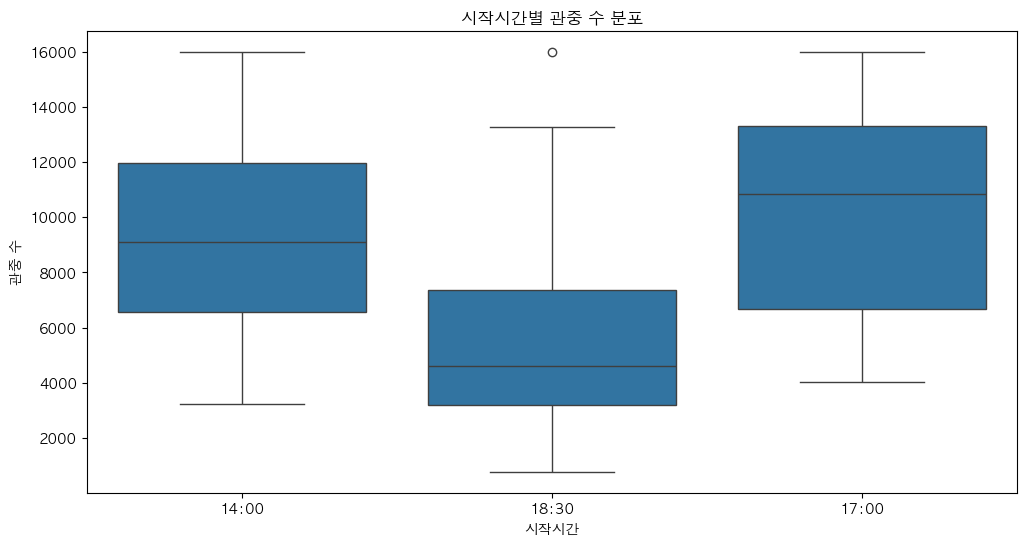

In [110]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='시작시간', y='관중 수', data=kiwoom_start_time_crowd)
plt.title('시작시간별 관중 수 분포')
plt.show()

In [111]:
from scipy.stats import f_oneway

# 시작시간으로 관중 수 그룹화
groups = [kiwoom_start_time_crowd['관중 수'][kiwoom_start_time_crowd['시작시간'] == start].values for start in start_order]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

ANOVA 결과: F-통계량 = 31.40, p-값 = 0.0000


In [112]:
if p_value < 0.05:
    print("시작시간별 관중 수 차이가 유의미합니다.")
else:
    print("시작시간별 관중 수 차이가 유의미하지 않습니다.")

시작시간별 관중 수 차이가 유의미합니다.


In [113]:
# 필요한 열만 선택
kiwoom_away_crowd = kiwoom[['원정팀', '관중 수']]
kiwoom_away_crowd

,원정팀,관중 수
0,롯데,8257
1,롯데,6115
2,LG,2298
3,LG,2304
4,LG,2055
...,...,...
166,SSG,10049
167,NC,3940
168,NC,4337
169,NC,3897


In [114]:
kiwoom_away_crowd.원정팀.unique()

array(['롯데', 'LG', 'NC', 'KIA', 'KT', 'SSG', '두산', '한화', '삼성'],
      dtype=object)

In [115]:
# 시작시간 순서 설정
away_order = \
    kiwoom_away_crowd['원정팀'].unique()

# 요일 순서에 맞게 정렬
kiwoom_away_crowd['원정팀'] = \
    pd.Categorical(
        kiwoom_away_crowd['원정팀'],
        categories=away_order, ordered=True
        )

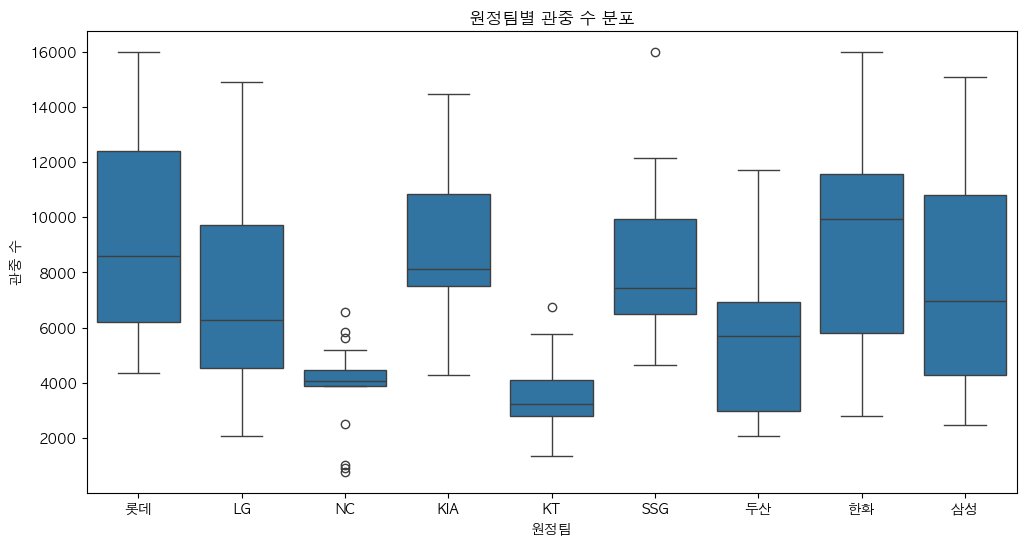

In [116]:
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='원정팀', y='관중 수',
    data=kiwoom_away_crowd
    )
plt.title('원정팀별 관중 수 분포')
plt.show()

In [117]:
from scipy.stats import f_oneway

# 요일별로 관중 수 그룹화
groups = \
    [
        kiwoom_away_crowd['관중 수'][kiwoom_away_crowd['원정팀'] == away].values for away in away_order
    ]

# ANOVA 수행
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA 결과: F-통계량 = {f_stat:.2f}, p-값 = {p_value:.4f}")

ANOVA 결과: F-통계량 = 9.34, p-값 = 0.0000


In [118]:
if p_value < 0.05:
    print("원정팀별 관중 수 차이가 유의미합니다.")
else:
    print("원정팀별 관중 수 차이가 유의미하지 않습니다.")

원정팀별 관중 수 차이가 유의미합니다.


In [119]:
kiwoom

,날짜,요일,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,토,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,일,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,화,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,수,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,목,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,일,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,화,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,수,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,목,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [126]:
kiwoom_final = kiwoom[['관중 수','요일','원정팀','시작시간','날짜']]
kiwoom_final

,관중 수,요일,원정팀,시작시간,날짜
0,8257,토,롯데,14:00,2022-04-02
1,6115,일,롯데,14:00,2022-04-03
2,2298,화,LG,18:30,2022-04-05
3,2304,수,LG,18:30,2022-04-06
4,2055,목,LG,18:30,2022-04-07
...,...,...,...,...,...
166,10049,일,SSG,14:01,2024-05-19
167,3940,화,NC,18:31,2024-05-21
168,4337,수,NC,18:31,2024-05-22
169,3897,목,NC,18:30,2024-05-23


In [133]:
kiwoom_final[kiwoom_final.날짜.Y == 2022]

AttributeError: 'Series' object has no attribute 'Y'

In [121]:
target_rows_18_30 = \
    kiwoom_final[
        (kiwoom_final['시작시간'] == '18:29') |
        (kiwoom_final['시작시간'] == '18:33') |
        (kiwoom_final['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_final.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [122]:
target_rows_14_00 = \
    kiwoom_final[
        (kiwoom_final['시작시간'] == '13:59') |
        (kiwoom_final['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_final.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [123]:
target_rows_17_00 = \
    kiwoom_final[
        (kiwoom_final['시작시간'] == '17:01') |
        (kiwoom_final['시작시간'] == '18:00') |
        (kiwoom_final['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_final.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [124]:
kiwoom_final

,관중 수,요일,원정팀,시작시간
0,8257,토,롯데,14:00
1,6115,일,롯데,14:00
2,2298,화,LG,18:30
3,2304,수,LG,18:30
4,2055,목,LG,18:30
...,...,...,...,...
166,10049,일,SSG,14:00
167,3940,화,NC,18:30
168,4337,수,NC,18:30
169,3897,목,NC,18:30


In [ ]:
# 2022~2023년 데이터와 2024년 데이터 분리
kiwoom_2022_2023 = \
    kiwoom[(kiwoom['연도'] == 2022) | (kiwoom['연도'] == 2023)]
kiwoom_2024 = kiwoom[kiwoom['연도'] == 2024]
kiwoom_2024 = kiwoom_2024.reset_index(drop=True)

In [ ]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_final.groupby('요일')['관중 수'].mean().sort_values()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("원정팀")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 원정팀별 평균 관중 수(2022~2023년)")

# 그래프 표시
plt.show()